# Import Important lib

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df=pd.read_csv('ds_salaries.csv')

# Count missing values 

In [20]:
null_counts = df.isnull().sum()
print(null_counts)

work_year              2
experience_level       9
employment_type        2
job_title             66
salary                 4
salary_currency        3
employee_residence     6
remote_ratio          12
company_location       2
company_size           2
dtype: int64


# Drop missing values 

In [21]:
df = df.dropna()
null_counts = df.isnull().sum()
print(null_counts)# Import Important lib

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


# Show types of columns 

In [50]:
df.dtypes

work_year           float64
experience_level     object
employment_type       int64
job_title            object
remote_ratio        float64
company_location     object
company_size          int64
salary_usd          float64
dtype: object

In [22]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2023.0,SE,FT,Principal Data Scientist,80000.0,EUR,ES,100.0,ES,L
1,2023.0,MI,CT,ML Engineer,30000.0,USD,US,100.0,US,S
2,2023.0,MI,CT,ML Engineer,25500.0,USD,US,100.0,US,S
3,2023.0,SE,FT,Data Scientist,175000.0,USD,CA,100.0,CA,M
4,2023.0,SE,FT,Data Scientist,120000.0,USD,CA,100.0,CA,M
...,...,...,...,...,...,...,...,...,...,...
3749,2021.0,SE,FT,Data Specialist,165000.0,USD,US,100.0,US,L
3753,2020.0,EN,CT,Business Data Analyst,100000.0,USD,US,100.0,US,L
3754,2021.0,SE,FT,Data Science Manager,7000000.0,INR,IN,50.0,IN,L
3755,2023.0,SE,FT,Data Scientist,219000.0,USD,CA,0.0,CA,M


# Import Important lib

In [23]:
# exp_level_map = {'SE': 1, 'MI': 2, 'EN': 3, 'EX': 4}

# df['experience_level'] = df['experience_level'].replace(exp_level_map)# Import Important lib

# Incoding company size and convert it to numbers 

In [24]:
Csize_map = {'S': 1, 'M': 2, 'L': 3}
df['company_size'] = df['company_size'].replace(Csize_map)# Import Important lib

# Converting all salaries to USD

In [54]:

# define exchange rates
exchange_rates = {'EUR': 1.22,
                  'USD': 1.0,
                  'INR': 0.014,
                  'HKD': 0.13,
                  'CHF': 1.10,
                  'GBP': 1.41,
                  'AUD': 0.75,
                  'SGD': 0.74,
                  'CAD': 0.82,
                  'ILS': 0.31,
                  'BRL': 0.19,
                  'THB': 0.031,
                  'PLN': 0.26,
                  'HUF': 0.0035,
                  'CZK': 0.046,
                  'DKK': 0.16,
                  'JPY': 0.0090,
                  'MXN': 0.049,
                  'TRY': 0.12,
                  'CLP': 0.0014}

# create a new column for salary in USD
df['salary_usd'] = df['salary'] * df['salary_currency'].map(exchange_rates)
# Import Important lib


KeyError: 'salary'

In [51]:
df

,work_year,experience_level,employment_type,job_title,remote_ratio,company_location,company_size,salary_usd
0,2023.0,SE,1,Principal Data Scientist,100.0,ES,3,97600.0
1,2023.0,MI,2,ML Engineer,100.0,US,1,30000.0
2,2023.0,MI,2,ML Engineer,100.0,US,1,25500.0
3,2023.0,SE,1,Data Scientist,100.0,CA,2,175000.0
4,2023.0,SE,1,Data Scientist,100.0,CA,2,120000.0
...,...,...,...,...,...,...,...,...
3749,2021.0,SE,1,Data Specialist,100.0,US,3,165000.0
3753,2020.0,EN,2,Business Data Analyst,100.0,US,3,100000.0
3754,2021.0,SE,1,Data Science Manager,50.0,IN,3,98000.0
3755,2023.0,SE,1,Data Scientist,0.0,CA,2,219000.0


# Drop the columns that we don't need 

In [34]:
df=df.drop(['salary','salary_currency','employee_residence'],axis=1)

In [33]:
df

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_usd
0,2023.0,SE,FT,Principal Data Scientist,ES,100.0,ES,3,97600.0
1,2023.0,MI,CT,ML Engineer,US,100.0,US,1,30000.0
2,2023.0,MI,CT,ML Engineer,US,100.0,US,1,25500.0
3,2023.0,SE,FT,Data Scientist,CA,100.0,CA,2,175000.0
4,2023.0,SE,FT,Data Scientist,CA,100.0,CA,2,120000.0
...,...,...,...,...,...,...,...,...,...
3749,2021.0,SE,FT,Data Specialist,US,100.0,US,3,165000.0
3753,2020.0,EN,CT,Business Data Analyst,US,100.0,US,3,100000.0
3754,2021.0,SE,FT,Data Science Manager,IN,50.0,IN,3,98000.0
3755,2023.0,SE,FT,Data Scientist,CA,0.0,CA,2,219000.0


# Show employment types 

In [35]:
df['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

# Incoding employment types and convert it to numbers 

In [36]:
df['employment_type'] = df['employment_type'].replace({'FT': 1, 'CT': 2, 'FL': 3, 'PT': 4})


In [37]:
df

,work_year,experience_level,employment_type,job_title,remote_ratio,company_location,company_size,salary_usd
0,2023.0,SE,1,Principal Data Scientist,100.0,ES,3,97600.0
1,2023.0,MI,2,ML Engineer,100.0,US,1,30000.0
2,2023.0,MI,2,ML Engineer,100.0,US,1,25500.0
3,2023.0,SE,1,Data Scientist,100.0,CA,2,175000.0
4,2023.0,SE,1,Data Scientist,100.0,CA,2,120000.0
...,...,...,...,...,...,...,...,...
3749,2021.0,SE,1,Data Specialist,100.0,US,3,165000.0
3753,2020.0,EN,2,Business Data Analyst,100.0,US,3,100000.0
3754,2021.0,SE,1,Data Science Manager,50.0,IN,3,98000.0
3755,2023.0,SE,1,Data Scientist,0.0,CA,2,219000.0


# Making box plot between salary in usd and experience level

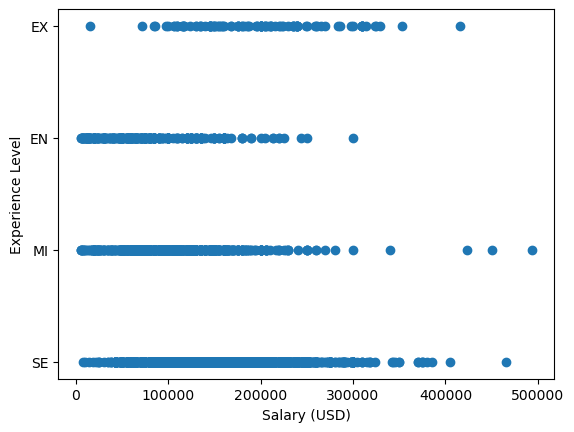

In [41]:
plt.scatter(df['salary_usd'],df['experience_level'] )
plt.ylabel('Experience Level')
plt.xlabel('Salary (USD)')
plt.show()

# Calculate IQR and Outlier

In [42]:

# calculate the IQR and outlier range
q1 = df['salary_usd'].quantile(0.25)
q3 = df['salary_usd'].quantile(0.75)
iqr = q3 - q1
outlier_range = (q1 - 1.5*iqr, q3 + 1.5*iqr)

# count the number of outliers
num_outliers = np.sum((df['salary_usd'] < outlier_range[0]) | (df['salary_usd'] > outlier_range[1]))

# print the number of outliers
print('Number of outliers:', num_outliers)# Import Important lib

Number of outliers: 68


# Remove outliers

In [43]:
df = df.loc[(df['salary_usd'] >= outlier_range[0]) & (df['salary_usd'] <= outlier_range[1])]

# Reploting after removing outliers

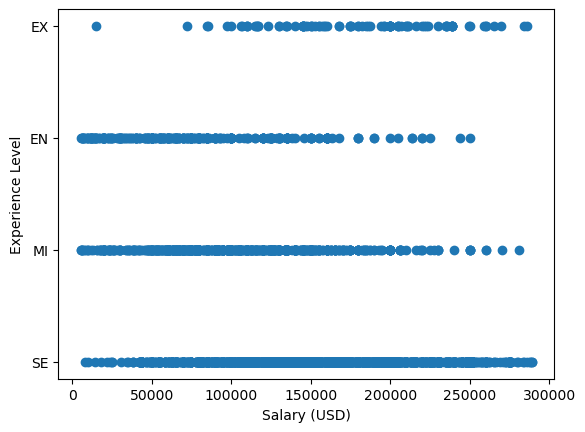

In [45]:
plt.scatter(df['salary_usd'],df['experience_level'] )
plt.ylabel('Experience Level')
plt.xlabel('Salary (USD)')
plt.show()# Import Important lib

# Calculate statistical measures of all data 

In [47]:
df.describe()

,work_year,employment_type,remote_ratio,company_size,salary_usd
count,3602.000000,3602.000000,3602.000000,3602.000000,3602.000000
mean,2022.383676,1.022488,46.210439,2.078845,135573.368581
std,0.689058,0.236363,48.586726,0.388536,56694.356651
min,2020.000000,1.000000,0.000000,1.000000,5520.000000
25%,2022.000000,1.000000,0.000000,2.000000,98000.000000
50%,2022.000000,1.000000,0.000000,2.000000,135000.000000
75%,2023.000000,1.000000,100.000000,2.000000,175000.000000
max,2023.000000,4.000000,100.000000,3.000000,289076.000000


In [52]:
df.to_csv("AfterPreProsccing")